In [13]:
import math

import numpy as np
import matplotlib.pyplot as plt

In [14]:
def AWGN_channel(x, sigma2):
    noise = np.sqrt(sigma2) * np.random.randn(x.size)
    return x + noise


def AWGNdemapper(y, const, varN):
    apps = np.exp(-np.abs(np.transpose([y]) - const) ** 2 / (2 * varN))
    return apps / np.transpose([np.sum(apps, 1)])


def sampler(prob, n):
    samples = np.empty(0)
    for idx, p in enumerate(prob):
        occurrences = np.round(n * p)
        samples = np.concatenate((samples, np.ones(occurrences.astype(int)) * idx))
    indexes = np.random.permutation(samples.shape[0])
    return samples[indexes]


def xesmd(apps, idx):
    '''
    Estimates symbolwise equivocation from reference symbols indices and a posteriori probabilities.
    '''
    eq = -np.log(np.take_along_axis(apps, idx[:, None], axis=1) / np.transpose([np.sum(apps, 1)]))
    eq[eq == np.inf] = 1000
    return np.mean(eq)

In [42]:
n = 100_000
SNR_dBs = np.arange(5,22)

In [49]:
np.arange(0,2.5,0.01).shape

(250,)

In [58]:
M = 8

plots_dict = np.empty(shape=(17,25000))

for idx, shaping in enumerate(np.arange(0,2.5,0.0001)):
    alphabet = np.arange(-7,8,2)
    alphabet = alphabet / np.sqrt(np.mean(alphabet**2))
    scaling = (alphabet[1]-alphabet[0])/2
    # scaling = 0.21821789023599236
    # print('Scaling: ', scaling)

    denominator = np.sum(np.exp(-shaping*np.square(alphabet)))
    probs = 1/denominator * np.exp(-shaping*np.square(alphabet))

    power = np.sum(np.square(np.arange(-7,8,2)*(scaling))*probs)
    # print('Power: ', power)

    indices = sampler(probs, n).astype(int)
    norm_factor = np.sqrt(np.sum(np.square(alphabet) * probs))
    alphabet =  alphabet / norm_factor
    symbols = alphabet[indices]
    scaling = (alphabet[1]-alphabet[0])/2
    # print('Scaling: ', scaling)


    H = np.sum(-np.log2(probs)*probs)
    # print('Entropy: ',H)
    power = np.mean(symbols**2)
    # print('Power: ', power)
    # plt.rcParams['figure.figsize'] = [4, 4]
    # plt.hist(symbols, bins=100)
    # plt.show()

    for jdx, snrdB in enumerate(SNR_dBs):
        sigma2 = 1/(10**(snrdB/10))
        sigma2 = sigma2
        y = AWGN_channel(symbols, sigma2)
        apps = AWGNdemapper(y, alphabet, sigma2)
        xe = xesmd(apps, indices)
        plots_dict[jdx][idx] = (2*(H - (xe) / np.log(2)))

In [59]:
print(np.max(plots_dict, 1).tolist())
mb = np.max(plots_dict, 1)

[2.0181797091051514, 2.2599814530946403, 2.5175535405157583, 2.7932277041304268, 3.0826739245333434, 3.377230188835848, 3.6899934438515736, 4.0075326600890975, 4.31873597282394, 4.6182136904595925, 4.890925420124305, 5.1459420900848585, 5.373427136806748, 5.566807246924699, 5.720596457528656, 5.83814651438834, 5.916856740690495]


In [61]:
mb = [2.0193916630846918, 2.2654022278277393, 2.5231306887622242, 2.7943201472250596, 3.0806359602235873, 3.3809640408051758, 3.69383842699387, 4.010358520455199, 4.318829495451576, 4.61704902872525, 4.895880050688773, 5.151007989533582, 5.376996748960784, 5.569021543421744, 5.722730806499707, 5.841398311333901, 5.9200053405287045]

In [96]:
from numpy import genfromtxt
my_data = genfromtxt('/home/ddeandres/Projects/internship_pcs/documentation/figs/mb_8_ask.csv', delimiter=',')

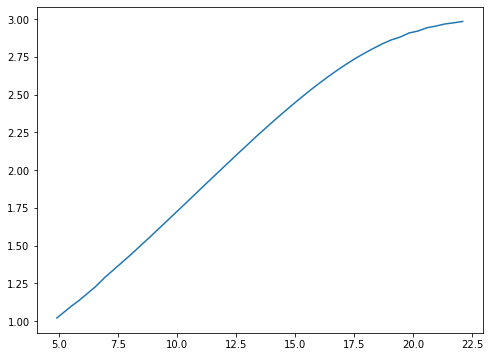

In [97]:
plt.plot(my_data[:,0], my_data[:,1])

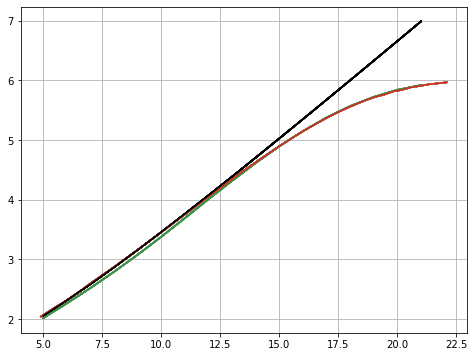

In [98]:
# Plot
plt.rcParams['figure.figsize'] = [8, 6]
for value in plots_dict:
    # print(key, value)
    plt.plot(SNR_dBs, mb)
    plt.plot(my_data[:,0], 2*my_data[:,1])
    plt.plot(SNR_dBs, np.log2(1+10**(SNR_dBs/10)), color='black', label='Capacity')

plt.grid()

In [ ]:


print()